---
title: "seasonal decomposition from scratch"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

In [2]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime as dt
import time
from statsmodels.tsa.stattools import adfuller

# %matplotlib widget

## sea surface temperature

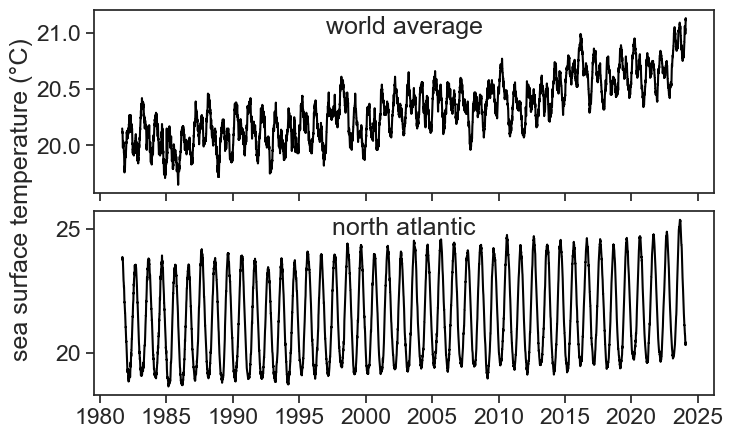

In [3]:
#| code-summary: "load and plot data"
df_north = pd.read_csv("sst_daily_north_atl.csv", index_col='date', parse_dates=True)
df_world = pd.read_csv("sst_daily_world.csv", index_col='date', parse_dates=True)

fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
fig.subplots_adjust(hspace=0.1)  # increase vertical space between panels
ax[0].plot(df_world['sst'], color="black")
ax[1].plot(df_north['sst'], color="black")
fig.text(0.02, 0.5, 'sea surface temperature (°C)', va='center', rotation='vertical')
ax[1].set(yticks=[20, 25])
ax[0].text(0.5, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='center', verticalalignment='top',)
ax[1].text(0.5, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='center', verticalalignment='top',)
pass

## trend

In [4]:
#| code-fold: false
df_north['trend'] = df_north['sst'].rolling('365D', center=True).mean()
df_world['trend'] = df_world['sst'].rolling('365D', center=True).mean()

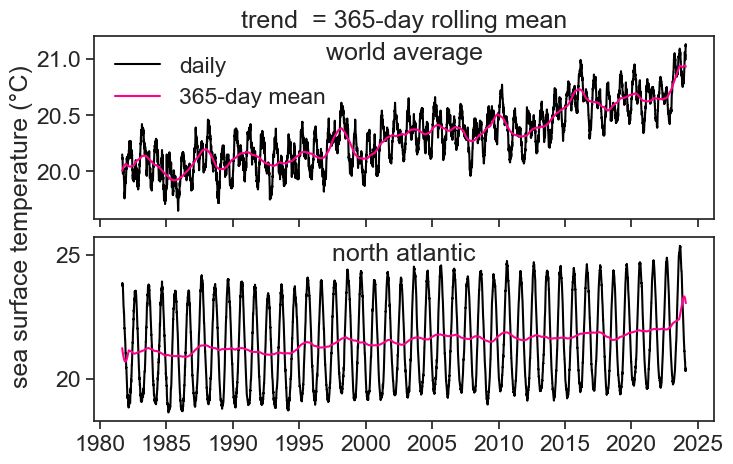

In [5]:
#| code-summary: "plot trend"
fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
fig.subplots_adjust(hspace=0.1)  # increase vertical space between panels
ax[0].plot(df_world['sst'], color="black", label="daily")
ax[0].plot(df_world['trend'], color="xkcd:hot pink", label="365-day mean")
ax[1].plot(df_north['sst'], color="black")
ax[1].plot(df_north['trend'], color="xkcd:hot pink")
fig.text(0.02, 0.5, 'sea surface temperature (°C)', va='center', rotation='vertical')
ax[0].set(title="trend  = 365-day rolling mean")
ax[1].set(yticks=[20, 25])
ax[0].text(0.5, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='center', verticalalignment='top',)
ax[1].text(0.5, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='center', verticalalignment='top',)
ax[0].legend(frameon=False)
pass

## detrend

$$
\text{detrended} = \text{signal} - \text{trend}
$$

In [6]:
#| code-fold: false
df_north['detrended'] = df_north['sst'] - df_north['trend']
df_world['detrended'] = df_world['sst'] - df_world['trend']

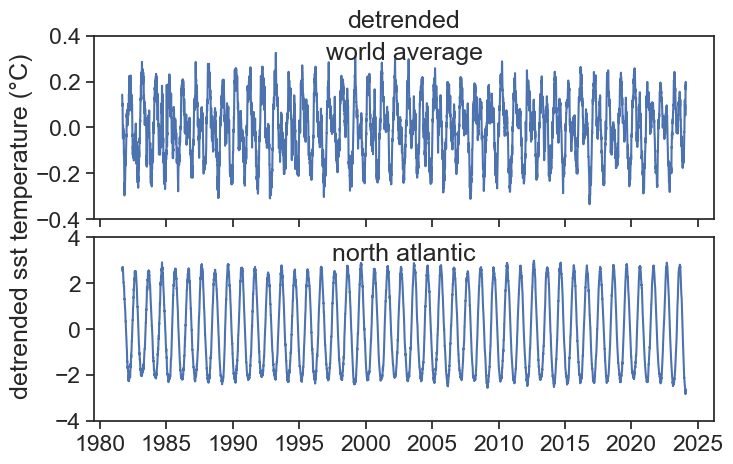

In [7]:
#| code-summary: "plot trend"
fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
fig.subplots_adjust(hspace=0.1)  # increase vertical space between panels
ax[0].plot(df_world['detrended'])
ax[1].plot(df_north['detrended'])
fig.text(0.02, 0.5, 'detrended sst temperature (°C)', va='center', rotation='vertical')
ax[0].set(ylim=[-0.4,0.4],
          title="detrended")
ax[1].set(ylim=[-4,4],)
ax[0].text(0.5, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='center', verticalalignment='top',)
ax[1].text(0.5, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='center', verticalalignment='top',)
pass

## seasonal component

It is useful to add two new columns to our dataframes: day of year and year:

In [8]:
#| code-fold: false
df_north['doy'] = df_north.index.day_of_year
df_north['year'] = df_north.index.year
df_world['doy'] = df_world.index.day_of_year
df_world['year'] = df_world.index.year
df_world

,sst,trend,detrended,doy,year
date,,,,,
1981-09-01,20.15,20.006721,0.143279,244,1981
1981-09-02,20.14,20.007717,0.132283,245,1981
1981-09-03,20.13,20.008703,0.121297,246,1981
1981-09-04,20.13,20.009624,0.120376,247,1981
1981-09-05,20.12,20.010481,0.109519,248,1981
...,...,...,...,...,...
2024-02-04,21.12,20.932460,0.187540,35,2024
2024-02-05,21.11,20.931882,0.178118,36,2024
2024-02-06,21.13,20.931297,0.198703,37,2024


### group by

This is an extremely useful method. As the name suggests, it groups data according to some criterion.

In [9]:
#| code-fold: false
gb_year_north = df_north.groupby('year')
gb_year_world = df_world.groupby('year')

Just like `resample` and `rolling`, `groupby` doesn't do anything after grouping the data, it waits for further instructions.

In [10]:
#| code-fold: false
gb_year_world['sst'].mean()

year
1981    19.953197
1982    20.051671
1983    20.133260
1984    20.029809
1985    19.924055
1986    19.994055
1987    20.148712
1988    20.108087
1989    20.039863
1990    20.152932
1991    20.145781
1992    20.069454
1993    20.080877
1994    20.098274
1995    20.170959
1996    20.118716
1997    20.269945
1998    20.328575
1999    20.117973
2000    20.151940
2001    20.286356
2002    20.321699
2003    20.370849
2004    20.328962
2005    20.412548
2006    20.374110
2007    20.321068
2008    20.312814
2009    20.432301
2010    20.436411
2011    20.314192
2012    20.369317
2013    20.403918
2014    20.525260
2015    20.647151
2016    20.671257
2017    20.607507
2018    20.567808
2019    20.652603
2020    20.678388
2021    20.630658
2022    20.648521
2023    20.889671
2024    21.042564
Name: sst, dtype: float64

If all you need is the average by years, then the most common way of writing the command would be in one single line:

```python
df_world.groupby('year')['sst'].mean()
```

Let's use `groupby` to plot world SST for all years, see how handy this method is.
Also note that groupby return an object that can be iterated upon, as we do below.

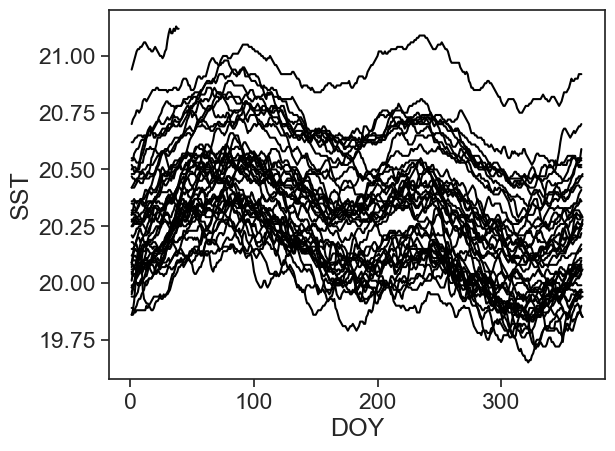

In [11]:
#| code-fold: false
fig, ax = plt.subplots()
for year, data in gb_year_world:
    ax.plot(data['doy'], data['sst'], color="black")
ax.set(xlabel="DOY", ylabel="SST");

With a few more lines of code we can make this look pretty.

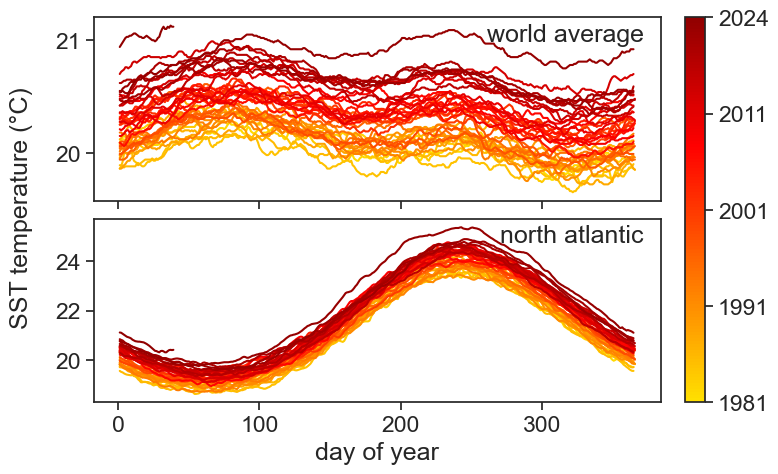

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
fig.subplots_adjust(hspace=0.1)

# define the segment of the colormap to use
start, end = 0.3, 0.8
base_cmap = plt.cm.hot_r
new_colors = base_cmap(np.linspace(start, end, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("trunc({n},{a:.2f},{b:.2f})".format(n=base_cmap.name, a=start, b=end), new_colors)
# defining the years for plotting
years = [year for year, _ in gb_year_world] + [year for year, _ in gb_year_north]
min_year, max_year = min(years), max(years)
# create a new normalization that matches the years to the new colormap
norm = mpl.colors.Normalize(vmin=min_year, vmax=max_year)
# plotting the data with year-specific colors from the new colormap
for year, data in gb_year_world:
    ax[0].plot(data.index.day_of_year, data['sst'], color=new_cmap(norm(year)))
for year, data in gb_year_north:
    ax[1].plot(data.index.day_of_year, data['sst'], color=new_cmap(norm(year)))

# colorbar setup
sm = mpl.cm.ScalarMappable(cmap=new_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax.ravel().tolist(), orientation='vertical', fraction=0.046, pad=0.04)
ticks_years = [1981, 1991, 2001, 2011, 2024]  # Specify years for colorbar ticks
cbar.set_ticks(np.linspace(min_year, max_year, num=len(ticks_years)))
cbar.set_ticklabels(ticks_years)
# adding shared ylabel and xlabel
fig.text(0.02, 0.5, 'SST temperature (°C)', va='center', rotation='vertical')
ax[1].set_xlabel("day of year")
ax[0].text(0.97, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='right', verticalalignment='top',)
ax[1].text(0.97, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='right', verticalalignment='top',);

Now let's do the same for the detrended SST:

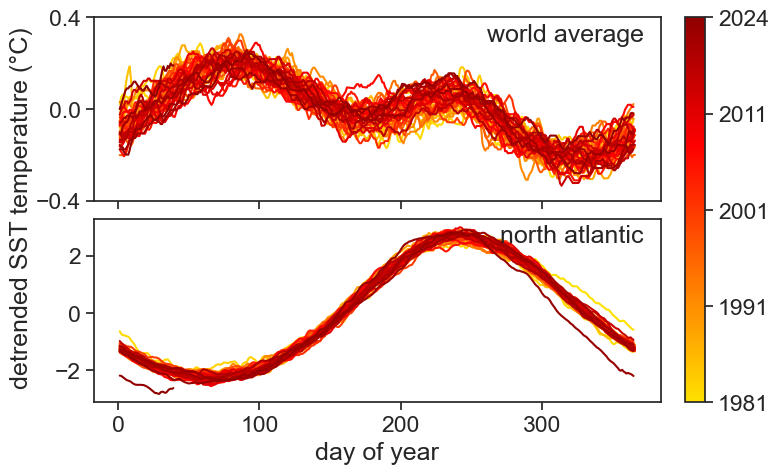

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
fig.subplots_adjust(hspace=0.1)

# define the segment of the colormap to use
start, end = 0.3, 0.8
base_cmap = plt.cm.hot_r
new_colors = base_cmap(np.linspace(start, end, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("trunc({n},{a:.2f},{b:.2f})".format(n=base_cmap.name, a=start, b=end), new_colors)
# defining the years for plotting
years = [year for year, _ in gb_year_world] + [year for year, _ in gb_year_north]
min_year, max_year = min(years), max(years)
# create a new normalization that matches the years to the new colormap
norm = mpl.colors.Normalize(vmin=min_year, vmax=max_year)
# plotting the data with year-specific colors from the new colormap
for year, data in gb_year_world:
    ax[0].plot(data.index.day_of_year, data['detrended'], color=new_cmap(norm(year)))
for year, data in gb_year_north:
    ax[1].plot(data.index.day_of_year, data['detrended'], color=new_cmap(norm(year)))
# colorbar setup
sm = mpl.cm.ScalarMappable(cmap=new_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax.ravel().tolist(), orientation='vertical', fraction=0.046, pad=0.04)
ticks_years = [1981, 1991, 2001, 2011, 2024]  # Specify years for colorbar ticks
cbar.set_ticks(np.linspace(min_year, max_year, num=len(ticks_years)))
cbar.set_ticklabels(ticks_years)
# adding shared ylabel and xlabel
fig.text(0.02, 0.5, 'detrended SST temperature (°C)', va='center', rotation='vertical')
ax[0].set(yticks=[-0.4,0,0.4])
ax[1].set_xlabel("day of year")
ax[0].text(0.97, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='right', verticalalignment='top',)
ax[1].text(0.97, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='right', verticalalignment='top',);

In order to determine what is the seasonal component, we need to calculate the average of the detrended data across all years. Again, `groupby` comes to rescue in a most elegant way:

In [14]:
#| code-fold: false
avg_north = df_north.groupby('doy')['detrended'].mean()
avg_world = df_world.groupby('doy')['detrended'].mean()

Let's incorporate the averages in the same graphs we saw above:

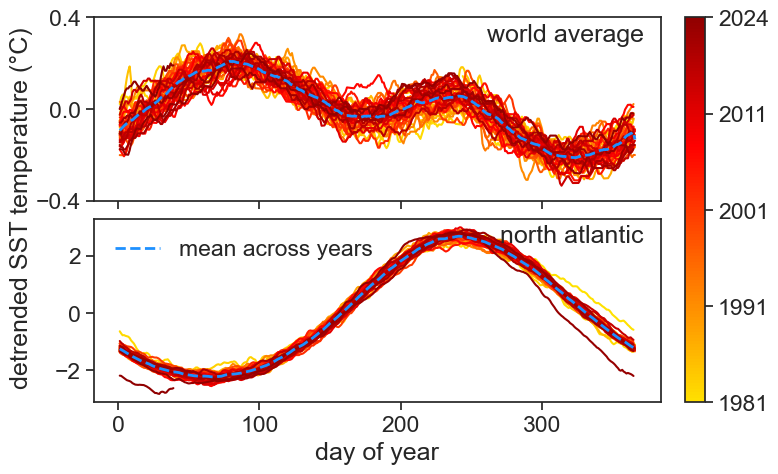

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
fig.subplots_adjust(hspace=0.1)

# define the segment of the colormap to use
start, end = 0.3, 0.8
base_cmap = plt.cm.hot_r
new_colors = base_cmap(np.linspace(start, end, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("trunc({n},{a:.2f},{b:.2f})".format(n=base_cmap.name, a=start, b=end), new_colors)
# defining the years for plotting
years = [year for year, _ in gb_year_world] + [year for year, _ in gb_year_north]
min_year, max_year = min(years), max(years)
# create a new normalization that matches the years to the new colormap
norm = mpl.colors.Normalize(vmin=min_year, vmax=max_year)
# plotting the data with year-specific colors from the new colormap
for year, data in gb_year_world:
    ax[0].plot(data.index.day_of_year, data['detrended'], color=new_cmap(norm(year)))
for year, data in gb_year_north:
    ax[1].plot(data.index.day_of_year, data['detrended'], color=new_cmap(norm(year)))

ax[0].plot(avg_world, color='dodgerblue', lw=2, ls='--')
ax[1].plot(avg_north, color='dodgerblue', lw=2, ls='--', label="mean across years")
ax[1].legend(loc="upper left", frameon=False)

# colorbar setup
sm = mpl.cm.ScalarMappable(cmap=new_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax.ravel().tolist(), orientation='vertical', fraction=0.046, pad=0.04)
ticks_years = [1981, 1991, 2001, 2011, 2024]  # Specify years for colorbar ticks
cbar.set_ticks(np.linspace(min_year, max_year, num=len(ticks_years)))
cbar.set_ticklabels(ticks_years)
# adding shared ylabel and xlabel
fig.text(0.02, 0.5, 'detrended SST temperature (°C)', va='center', rotation='vertical')
ax[0].set(yticks=[-0.4,0,0.4])
ax[1].set_xlabel("day of year")
ax[0].text(0.97, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='right', verticalalignment='top',)
ax[1].text(0.97, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='right', verticalalignment='top',);

In [16]:
avg_north

doy
1     -1.258903
2     -1.287413
3     -1.312651
4     -1.345564
5     -1.378712
         ...   
362   -1.127575
363   -1.160508
364   -1.192747
365   -1.220802
366   -1.234997
Name: detrended, Length: 366, dtype: float64

In [25]:
df_north

,sst,trend,detrended,doy,year,seasonal,resid
date,,,,,,,
1981-09-01,23.78,21.237432,2.542568,244,1981,2.655598,-0.113030
1981-09-02,23.77,21.225380,2.544620,245,1981,2.650287,-0.105667
1981-09-03,23.80,21.213351,2.586649,246,1981,2.638455,-0.051806
1981-09-04,23.83,21.201237,2.628763,247,1981,2.635235,-0.006472
1981-09-05,23.87,21.188877,2.681123,248,1981,2.629680,0.051443
...,...,...,...,...,...,...,...
2024-02-04,20.37,23.096310,-2.726310,35,2024,-2.018653,-0.707657
2024-02-05,20.41,23.085914,-2.675914,36,2024,-2.034478,-0.641436
2024-02-06,20.42,23.075405,-2.655405,37,2024,-2.052858,-0.602547


The seasonal component is the average across all years, repeated over and over.

In [17]:
#| code-fold: false
df_north['seasonal'] = df_north['doy'].map(avg_north)
df_world['seasonal'] = df_world['doy'].map(avg_world)

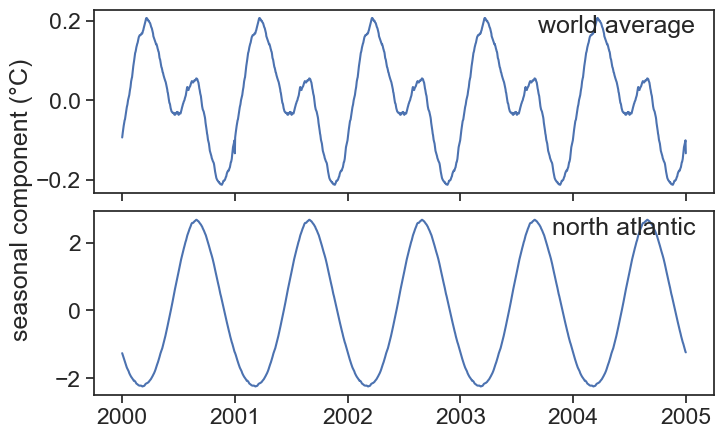

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
fig.subplots_adjust(hspace=0.1)
ax[0].plot(df_world.loc['2000':'2004', 'seasonal'])
ax[1].plot(df_north.loc['2000':'2004', 'seasonal'])
# adding shared ylabel and xlabel
fig.text(0.02, 0.5, 'seasonal component (°C)', va='center', rotation='vertical')
ax[0].text(0.97, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='right', verticalalignment='top',)
ax[1].text(0.97, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='right', verticalalignment='top',);

## residual

$$
\text{residual} = \text{signal} - \text{trend} - \text{seasonal}
$$

In [19]:
#| code-fold: false
df_world['resid'] = df_world['detrended'] - df_world['seasonal']
df_north['resid'] = df_north['detrended'] - df_north['seasonal']

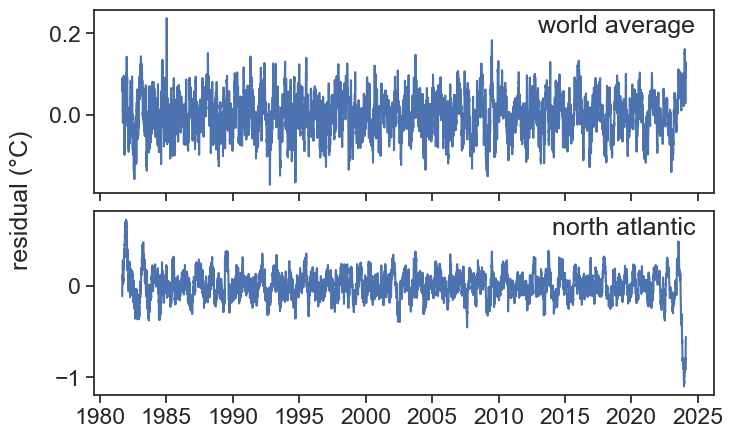

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
fig.subplots_adjust(hspace=0.1)
ax[0].plot(df_world['resid'])
ax[1].plot(df_north['resid'])
# adding shared ylabel and xlabel
fig.text(0.02, 0.5, 'residual (°C)', va='center', rotation='vertical')
ax[0].text(0.97, 0.97, r"world average", transform=ax[0].transAxes,
           horizontalalignment='right', verticalalignment='top',)
ax[1].text(0.97, 0.97, r"north atlantic", transform=ax[1].transAxes,
           horizontalalignment='right', verticalalignment='top',);

How do we know we have properly decomposed our signal into `trend`, `seasonal` and `residual`? The residual should be stationary. Let's check using the ADF test:

In [21]:
result = adfuller(df_world['resid'])
print('World-average residual\nADF test p-value: ', result[1])

result = adfuller(df_north['resid'])
print('North-Atlantic residual\nADF test p-value: ', result[1])

World-average residual
ADF test p-value:  1.5673285788450267e-25
North-Atlantic residual
ADF test p-value:  5.2285789371886856e-18


## seasonal decomposition

It is customary to plot each component in its own panel:

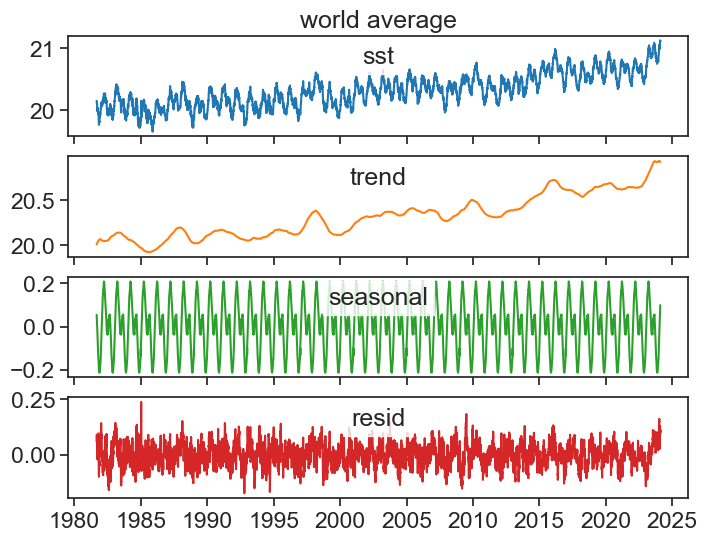

In [22]:
fig, ax = plt.subplots(4, 1, figsize=(8,6), sharex=True)
pos = (0.5, 0.9)
components =["sst", "trend", "seasonal", "resid"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
for axx, component, color in zip(ax, components, colors):
    data = getattr(df_world, component)
    axx.plot(data, color=color)
    axx.text(*pos, component, bbox=dict(facecolor='white', alpha=0.8),
           transform=axx.transAxes, ha='center', va='top')
ax[0].set(title="world average");

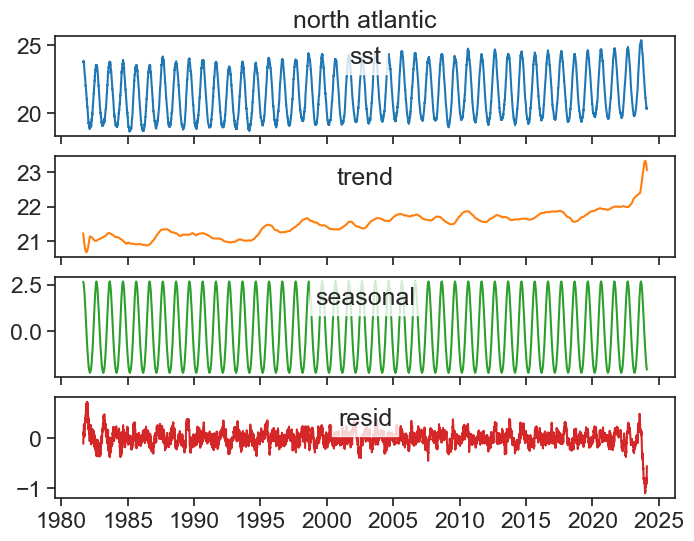

In [23]:
fig, ax = plt.subplots(4, 1, figsize=(8,6), sharex=True)
pos = (0.5, 0.9)
components =["sst", "trend", "seasonal", "resid"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
for axx, component, color in zip(ax, components, colors):
    data = getattr(df_north, component)
    axx.plot(data, color=color)
    axx.text(*pos, component, bbox=dict(facecolor='white', alpha=0.8),
           transform=axx.transAxes, ha='center', va='top')
ax[0].set(title="north atlantic");

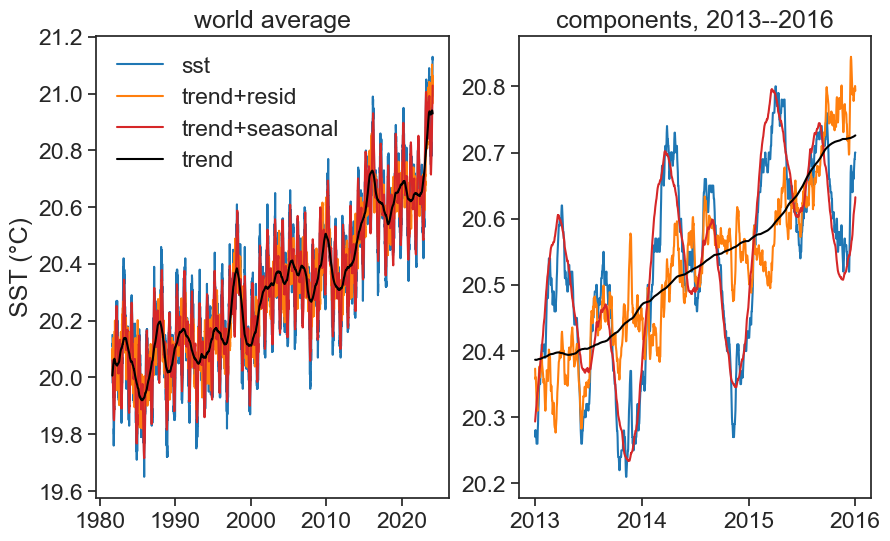

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(df_world['sst'], color="tab:blue", label="sst")
ax[0].plot(df_world['trend'] + df_world['resid'], color="tab:orange", label="trend+resid")
ax[0].plot(df_world['trend'] + df_world['seasonal'], color="tab:red", label="trend+seasonal")
ax[0].plot(df_world['trend'], color="black", label="trend")
ax[0].set(ylabel="SST (°C)",
          title="world average")
date_form = DateFormatter("%Y")
ax[0].xaxis.set_major_formatter(date_form)
ax[0].xaxis.set_major_locator(mdates.YearLocator(10))
ax[0].legend(frameon=False)

start = "2013-01-01"
end = "2016-01-01"
zoom = slice(start, end)
ax[1].plot(df_world.loc[zoom, 'sst'], color="tab:blue", label="sst")
ax[1].plot(df_world.loc[zoom, 'trend'] + df_world.loc[zoom, 'resid'], color="tab:orange", label="trend+resid")
ax[1].plot(df_world.loc[zoom, 'trend'] + df_world.loc[zoom, 'seasonal'], color="tab:red", label="trend+seasonal")
ax[1].plot(df_world.loc[zoom, 'trend'], color="black", label="trend")
date_form = DateFormatter("%Y")
ax[1].xaxis.set_major_formatter(date_form)
ax[1].xaxis.set_major_locator(mdates.YearLocator(1))
ax[1].set_title("components, 2013--2016");
